In [2]:
#Imports
from FDTD.FDTDElastic import FDTDElasticModel
from FDTD.Materials import materials
import numpy as np
from numpy import pi
import sys
import matplotlib.pyplot as plt
print(materials["steel"].mu)

83721800000


Initialized elastic FDTD field of size 400,200


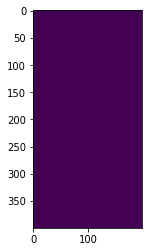

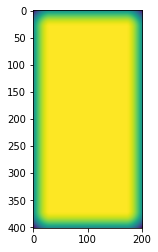

In [3]:
#Run the initial simulation
numT = 5000
#Frequency, hz
f0=100000
#Period
t0 = 1.00 / f0
def gaussFunc(t, nt):
    v = np.exp(-(((2*(t-2*t0)/(t0))**2)))*np.sin(2*pi*f0*t)*0.01
    return [v,v]

sources = []
#Formatted as tuple of [x,y,function]
sources.append([100,100, gaussFunc])

materialGrid = np.full([400,200], materials["steel"])

#for x in np.arange(100,150):
#    for z in np.arange(0,200):
#        if (x+z) % 10 == 0:
#            materialGrid[x,z]=materials["Nylon"]

#vs/(freq*10)
model = FDTDElasticModel(sources, materialGrid=materialGrid, ds=0.0015)

%matplotlib inline
plt.imshow(model.rho)
plt.show()

plt.imshow(model.weights)

In [4]:
for i in range(numT):
    model.timeStep()
    sys.stdout.write("\r Frame {0} of {1}".format(str(i+1), numT))
    sys.stdout.flush()
print("\nDone")
print("Average update time, ms: " + str(np.mean(model.frameTime[1::])))

 Frame 5000 of 5000
Done
Average update time, ms: 4.157404156536264


In [5]:
#Initial pulse render
from FDTD.AnimationHelpers import matplotlibAnimation
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
ani = matplotlibAnimation(model.resultMagnitude, nFrames=20)
ani.save("A:/im.gif")
ani

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
